<a href="https://colab.research.google.com/github/gaston-nieto/diplo2024/blob/develop/No_Supervisado/Female_players.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Práctico entregable:


Utilizar la base de jugadores “female_players.csv” disponible en la página de Kaggle https://www.kaggle.com/datasets/stefanoleone992/fifa-23-complete-player-dataset . Consideren que en comparación con la base vista en clase, esta base no tiene los mismos jugadores (ahora mujeres 2023) y no tiene exactamente el mismo formato (a los nombres de las variables se les agregó una keyword para identificar a qué tipo de habilidad corresponde).


Con la nueva base, realizar el siguiente análisis. Notar que es más completo pero análogo al que realizamos con los datos FIFA2019 en el cursado de la materia. Realice comentarios en cada parte (verbose=True ;))



1- Análisis exploratorio inicial de la base.


2- Evaluación visual e intuitiva de a dos variables numéricas por vez. Sugerencia: hagan los scatterplots de las combinaciones de dos variables que tengan algún sentido para ustedes, porque todas las combinaciones de variables son muchas y no van a poder analizarlas como merecen.


3- Pregunta: ¿Se realizó alguna normalización o escalado de la base? ¿Por qué ?


4- Aplicación de clustering para encontrar grupos de jugadoras con habilidades equivalentes, por ejemplo, jugadoras que podrían intercambiarse en el caso de una lesión o cuando una jugadora está cansada. Para esto utilice como mínimo dos técnicas de clustering: por ejemplo k-medias, DBSCAN, mezcla de Gaussianas y/o alguna jerárquica. Justifiquen por qué eligen los diferentes hiper-parámetros que se puedan elegir según el método: número de clusters, medida de distancia, criterio de aglomeración…


5- Análisis cualitativo de los clusters encontrados. ¿Qué hay en cada cluster? ¿Son efectivamente equivalentes las jugadoras de un cluster, es decir, podrían cumplir el mismo rol en un equipo? Si se trata de clusters heterogéneos, ¿por qué razón pueden haber sido agrupadas las jugadoras del cluster? ¿Qué motiva las diferencias en tamaño?


6- Uso de alguna transformación (proyección, Embedding) para visualizar los resultados y/o usarla como preprocesado para aplicar alguna técnica de clustering.

In [244]:
# pip install dfSummary

In [245]:
import pandas as pd
# from summarytools import dfSummary

In [246]:
# Cargar El Archivo a sample_data en caso de querer volver a ejecutar la notebook

df_base=pd.read_csv("./sample_data/female_players.csv")
df_base.head()

<ipython-input-246-fa32a6239e8b>:3: DtypeWarning:

Columns (17,20,21,23,24) have mixed types. Specify dtype option on import or set low_memory=False.



,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,227125,/player/227125/sam-kerr/230009,23,9,2023-01-13,S. Kerr,Samantha May Kerr,ST,91,91,...,62+3,62+3,64+3,61+3,58+3,58+3,58+3,61+3,20+3,https://cdn.sofifa.net/players/227/125/23_120.png
1,227316,/player/227316/wendie-renard/230009,23,9,2023-01-13,W. Renard,Wéndèleine Thérèse Renard,CB,91,91,...,87+3,87+3,80+3,82+3,91,91,91,82+3,21+3,https://cdn.sofifa.net/players/227/316/23_120.png
2,226301,/player/226301/alex-morgan/230009,23,9,2023-01-13,A. Morgan,Alexandra Morgan Carrasco,ST,90,90,...,67+3,67+3,69+3,66+3,60+3,60+3,60+3,66+3,19+3,https://cdn.sofifa.net/players/226/301/23_120.png
3,227310,/player/227310/ada-hegerberg/230009,23,9,2023-01-13,A. Hegerberg,Ada Martine Stolsmo Hegerberg,ST,90,91,...,61+3,61+3,63+3,60+3,56+3,56+3,56+3,60+3,20+3,https://cdn.sofifa.net/players/227/310/23_120.png
4,227246,/player/227246/lucy-bronze/230009,23,9,2023-01-13,L. Bronze,Lucia Roberta Tough Bronze,RB,89,89,...,86+3,86+3,87+2,87+2,87+2,87+2,87+2,87+2,20+3,https://cdn.sofifa.net/players/227/246/23_120.png


#**1- Análisis exploratorio inicial de la base: en que liga juegan, de que paises son**

---



In [247]:
print(df_base.shape)

(181361, 110)


In [248]:
column_names = df_base.columns.tolist()
print(column_names)
# column_names

['player_id', 'player_url', 'fifa_version', 'fifa_update', 'fifa_update_date', 'short_name', 'long_name', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'league_id', 'league_name', 'league_level', 'club_team_id', 'club_name', 'club_position', 'club_jersey_number', 'club_loaned_from', 'club_joined_date', 'club_contract_valid_until_year', 'nationality_id', 'nationality_name', 'nation_team_id', 'nation_position', 'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_sp

In [249]:
check=df_base[['league_id', 'league_name', 'league_level', 'club_team_id', 'club_name', 'club_position', 'club_jersey_number', 'club_loaned_from', 'club_joined_date', 'club_contract_valid_until_year','nationality_id', 'nationality_name', 'nation_team_id', ]]
check

,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id
0,2216.0,Women's Super League,1.0,116010.0,Chelsea W,ST,20.0,NaN,2020-01-01,2024.0,195,Australia,NaN
1,2218.0,Feminine Division 1,1.0,116033.0,Lyon W,LCB,3.0,NaN,2006-07-01,2026.0,18,France,113003.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95,United States,113009.0
3,2218.0,Feminine Division 1,1.0,116033.0,Lyon W,RES,14.0,NaN,2014-07-01,2024.0,36,Norway,113007.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,England,113002.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70,Canada,113000.0
181357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83,Mexico,113010.0
181358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,Italy,113005.0
181359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83,Mexico,113010.0


In [250]:
print(f'Versión de FIFA: {df_base.fifa_version.unique()}')
print(f'Actualizaciones de FIFA: {df_base.fifa_update.unique()}')

Versión de FIFA: [23 22 21 20 19 18 17 16]
Actualizaciones de FIFA: [ 9  8  7  6  5  4  3  2  1 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55
 54 53 52 51 50 49 48 47 46 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31
 30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10 75 74 73
 72 71 70 84 83 82 81 80 79 78 77 76 99 98 97 96 95 94 93 92 91 90 89 88
 87 86 85]


*Trataremos* de quedarnos solo con las columnas que utilizaremos además nos quedaremos con la última versión de FIFA con su última actualización, para no tener valores de jugaras, repetidos

In [251]:
df_base=df_base[df_base['fifa_version']==23]
df_base=df_base[df_base['fifa_update']==9]
print(f'Versión de FIFA: {df_base.fifa_version.unique()}')
print(f'Actualizaciones de FIFA: {df_base.fifa_update.unique()}')
print(f'Cantidad total de jugadoras: {len(df_base.player_id.unique())}')

Versión de FIFA: [23]
Actualizaciones de FIFA: [9]
Cantidad total de jugadoras: 832


In [252]:
check=df_base['nationality_name'].isnull().sum()
check

0

In [253]:
# pip install folium

In [254]:
df_nacionalidad = df_base.copy()[['nationality_name', 'player_id']]
df_nacionalidad = df_nacionalidad.groupby(['nationality_name'], as_index=False)['player_id'].count()
world_merged = df_nacionalidad.sort_values('player_id', ascending=False)
world_merged=world_merged.rename(columns={'player_id':'cantidad_jugadoras'})
print(world_merged["nationality_name"].unique())
print("-------------------------------------------------------")
print('Cantidad de paises:', len(world_merged["nationality_name"].unique()))
world_merged.head()

['France' 'England' 'United States' 'Canada' 'Germany' 'Spain' 'Scotland'
 'Netherlands' 'Belgium' 'Portugal' 'Brazil' 'Sweden' 'Norway' 'Mexico'
 'China PR' 'Argentina' 'Iceland' 'Wales' 'Republic of Ireland' 'Denmark'
 'Australia' 'Switzerland' 'Poland' "Côte d'Ivoire" 'Haiti' 'Cameroon'
 'Northern Ireland' 'Jamaica' 'Japan' 'New Zealand' 'Nigeria' 'Finland'
 'Korea Republic' 'Russia' 'Austria' 'Serbia' 'South Africa' 'Algeria'
 'Italy' 'Czech Republic' 'Morocco' 'Montenegro' 'Kenya' 'Slovakia'
 'Israel' 'Greece' 'Costa Rica' 'Thailand' 'Tunisia' 'Turkey' 'Ukraine'
 'Chile' 'Venezuela' 'Mali']
-------------------------------------------------------
Cantidad de paises: 54


,nationality_name,cantidad_jugadoras
16,France,170
14,England,129
51,United States,33
7,Canada,31
17,Germany,30


In [255]:
coordenadas_paises = {
    'France': [46.6034, 1.8883],
    'England': [52.3555, -1.1743],
    'Germany': [51.1657, 10.4515],
    'United States': [37.0902, -95.7129],
    'Canada': [56.1304, -106.3468],
    'Spain': [40.4637, -3.7492],
    'Netherlands': [52.1326, 5.2913],
    'Brazil': [-14.2350, -51.9253],
    'Sweden': [60.1282, 18.6435],
    'Belgium': [50.8503, 4.3517],
    'Portugal': [39.3999, -8.2245],
    'Norway': [60.4720, 8.4689],
    'Scotland': [56.4907, -4.2026],
    'China PR': [35.8617, 104.1954],
    'Mexico': [23.6345, -102.5528],
    'Australia': [-25.2744, 133.7751],
    'New Zealand': [-40.9006, 174.8860],
    'Iceland': [64.9631, -19.0208],
    'Argentina': [-38.4161, -63.6167],
    'Wales': [52.1307, -3.7837],
    'Republic of Ireland': [53.1424, -7.6921],
    'Denmark': [56.2639, 9.5018],
    'Switzerland': [46.8182, 8.2275],
    'Poland': [51.9194, 19.1451],
    'Haiti': [18.9712, -72.2852],
    "Côte d'Ivoire": [7.539989, -5.547080],
    'Northern Ireland': [54.7877, -6.4923],
    'Cameroon': [7.3697, 12.3547],
    'Finland': [61.9241, 25.7482],
    'Jamaica': [18.1096, -77.2975],
    'Japan': [36.2048, 138.2529],
    'Nigeria': [9.0820, 8.6753],
    'Russia': [61.5240, 105.3188],
    'Korea Republic': [35.9078, 127.7669],
    'Austria': [47.5162, 14.5501],
    'Algeria': [28.0339, 1.6596],
    'Czech Republic': [49.8175, 15.4730],
    'Italy': [41.8719, 12.5674],
    'South Africa': [-30.5595, 22.9375],
    'Costa Rica': [9.7489, -83.7534],
    'Venezuela': [6.4238, -66.5897],
    'Chile': [-35.6751, -71.5430],
    'Ukraine': [48.3794, 31.1656],
    'Turkey': [38.9637, 35.2433],
    'Tunisia': [33.8869, 9.5375],
    'Thailand': [15.8700, 100.9925],
    'Morocco': [31.7917, -7.0926],
    'Montenegro': [42.7087, 19.3744],
    'Greece': [39.0742, 21.8243],
    'Slovakia': [48.6690, 19.6990],
    'Serbia': [44.0165, 21.0059],
    'Israel': [31.0461, 34.8516],
    'Mali': [17.5707, -3.9962],
    'Kenya': [-1.2921, 36.8219]
}


In [256]:
import folium
mapa = folium.Map(location=[0, 0], zoom_start=2.4, width='80%', height='100%',zoom_control=False,)

for idx, row in world_merged.iterrows():
    if not pd.isna(row['cantidad_jugadoras']) and row['nationality_name'] in coordenadas_paises:
        coords = coordenadas_paises[row['nationality_name']]
        folium.Marker(
            location=coords,
            popup=f"{row['nationality_name']}: {int(row['cantidad_jugadoras'])} jugadoras",
            icon=folium.DivIcon(html=f"""
                <div style="font-size: 12px; font-weight: bold; color: red;">
                    {int(row['cantidad_jugadoras'])}
                </div>
            """),
        fill_color='YlGnBu',
        fill_opacity=0.7,
        line_opacity=0.2,
        ).add_to(mapa)

mapa


In [257]:
df_base['league_level'] = df_base['league_level'].fillna(999)
df_base['league_name'] = df_base['league_name'].fillna('Sin Liga')
df_base['club_name'] = df_base['club_name'].fillna('Sin Club')

In [258]:
club_base=df_base.copy()[['player_id','league_level','league_name',  'club_name']]
club_base=club_base.groupby(['club_name','league_name','league_level'],as_index=False)['player_id'].count()
club_base=club_base.rename(columns={'player_id':'cantidad_jugadoras'}).sort_values('cantidad_jugadoras',ascending=False)

print('Cantidad de Clubes:', len(club_base["club_name"].unique()))
print(club_base["club_name"].unique())
print("-------------------------------------------------------")
print('Cantidad de Ligas', len(club_base["league_name"].unique()))
print(club_base["league_name"].unique())
print("-------------------------------------------------------")
print('Niveles de Ligas:', len(club_base["league_level"].unique()))
print(club_base["league_level"].unique())
print("-------------------------------------------------------")


club_base

Cantidad de Clubes: 25
['Sin Club' 'Lyon W' 'Chelsea W' 'Paris SG W' 'Tottenham W'
 'Aston Villa W' 'Brighton & Hove Albion W' 'Liverpool W'
 'Stade de Reims W' 'Manchester City W' 'Arsenal W' 'Leicester City W'
 'Fleury 91 W' 'Manchester United W' 'Paris W' 'Reading W' 'Everton W'
 'Soyaux W' 'Le Havre W' 'Guingamp W' 'Montpellier W' 'Rodez W' 'Dijon W'
 'Bordeaux W' 'West Ham W']
-------------------------------------------------------
Cantidad de Ligas 3
['Sin Liga' 'Feminine Division 1' "Women's Super League"]
-------------------------------------------------------
Niveles de Ligas: 2
[999.   1.]
-------------------------------------------------------


,club_name,league_name,league_level,cantidad_jugadoras
20,Sin Club,Sin Liga,999.0,293
12,Lyon W,Feminine Division 1,1.0,28
4,Chelsea W,Women's Super League,1.0,27
16,Paris SG W,Feminine Division 1,1.0,26
23,Tottenham W,Women's Super League,1.0,25
1,Aston Villa W,Women's Super League,1.0,25
3,Brighton & Hove Albion W,Women's Super League,1.0,24
11,Liverpool W,Women's Super League,1.0,23
22,Stade de Reims W,Feminine Division 1,1.0,23
13,Manchester City W,Women's Super League,1.0,23


In [259]:
import plotly.express as px

base_clubes=club_base.copy()
base_clubes=base_clubes[base_clubes["league_name"].isin(['Feminine Division 1',"Women's Super League" ])]

fig = px.bar(base_clubes.sort_values('cantidad_jugadoras'),x='club_name', y='cantidad_jugadoras', color='cantidad_jugadoras', text='cantidad_jugadoras', color_continuous_scale='sunset',title='Cantidad de Jugadoras por Club')
fig.update_layout(xaxis_title='Club',yaxis_title='Cantidad de Jugadoras',xaxis={'categoryorder':'total ascending'}  )

fig.show()


Observamos que la mayoria de las jugadores pertenecen a clubes ingleses y franceses.

# **CLASIFICAMOS LAS JUGADORAS DE FUTBOL**

---
De acuerdo a páginas de FIFA, clasificaremos a las jugadoras, según su posición.

Fuente:


*   https://www.fifplay.com/encyclopedia/position/
*   https://fifauteam.com/fifa-21-positions/





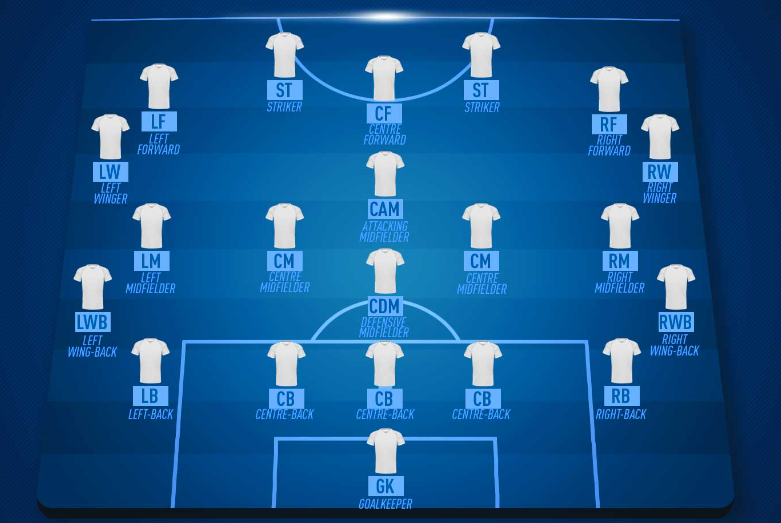

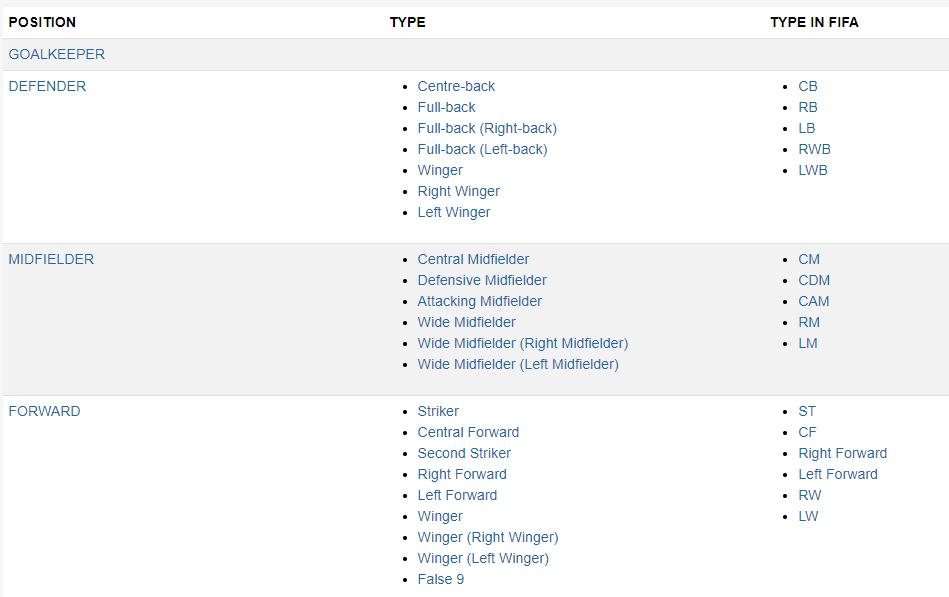

In [260]:
#Posiciones únicas del FIFA
check_pos=df_base.copy()[["player_positions"]]
check_pos = check_pos.assign(player_positions=check_pos['player_positions'].str.split(', ')).explode('player_positions')
check_pos=check_pos["player_positions"].unique()
print(len(check_pos))
check_pos

15


array(['ST', 'CB', 'RB', 'RW', 'LW', 'RM', 'CAM', 'CM', 'CDM', 'GK', 'LM',
       'LB', 'CF', 'LWB', 'RWB'], dtype=object)

In [261]:
import re

positions = ['ls','st','rs','lw','lf','cf','rf','rw','lam','cam',
 'ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb','gk']
def extract_base_rating(position):
    # Si el valor no es NaN, extraer la calificación base
    if pd.notna(position) and re.match(r'^\d+', position):
        return int(re.match(r'(\d+)', position).group(1))
    else:
        return np.nan

df_base = df_base.dropna(subset=positions, how='all')

def best_position(row):
    ratings = {col: extract_base_rating(val) for col, val in row.items() if pd.notna(val)}
    if ratings:
        return max(ratings, key=ratings.get)
    else:
        return np.nan

df_base['player_positions'] = df_base[positions].apply(best_position, axis=1)

df_base['player_positions'] = df_base['player_positions'].str.upper().tolist()

df_base.head(5)

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,227125,/player/227125/sam-kerr/230009,23,9,2023-01-13,S. Kerr,Samantha May Kerr,LS,91,91,...,62+3,62+3,64+3,61+3,58+3,58+3,58+3,61+3,20+3,https://cdn.sofifa.net/players/227/125/23_120.png
1,227316,/player/227316/wendie-renard/230009,23,9,2023-01-13,W. Renard,Wéndèleine Thérèse Renard,LCB,91,91,...,87+3,87+3,80+3,82+3,91,91,91,82+3,21+3,https://cdn.sofifa.net/players/227/316/23_120.png
2,226301,/player/226301/alex-morgan/230009,23,9,2023-01-13,A. Morgan,Alexandra Morgan Carrasco,LS,90,90,...,67+3,67+3,69+3,66+3,60+3,60+3,60+3,66+3,19+3,https://cdn.sofifa.net/players/226/301/23_120.png
3,227310,/player/227310/ada-hegerberg/230009,23,9,2023-01-13,A. Hegerberg,Ada Martine Stolsmo Hegerberg,LS,90,91,...,61+3,61+3,63+3,60+3,56+3,56+3,56+3,60+3,20+3,https://cdn.sofifa.net/players/227/310/23_120.png
4,227246,/player/227246/lucy-bronze/230009,23,9,2023-01-13,L. Bronze,Lucia Roberta Tough Bronze,LWB,89,89,...,86+3,86+3,87+2,87+2,87+2,87+2,87+2,87+2,20+3,https://cdn.sofifa.net/players/227/246/23_120.png


In [262]:
import itertools

delanteras = ['RF', 'ST', 'LW', 'LF', 'RS', 'LS', 'RM', 'LM', 'RW']
mediocampistas = ['RCM', 'LCM', 'LDM', 'CAM', 'CDM', 'LAM', 'RDM', 'CM', 'RAM', 'CF']
defensoras = ['RCB', 'CB', 'LCB', 'LB', 'RB', 'RWB', 'LWB']
arqueras = ['GK']

# Generar todas las combinaciones posibles dentro de cada lista
def generar_combinaciones(lista):
    combinaciones = []
    for i in range(1, len(lista) + 1):
        combinaciones.extend(list(itertools.combinations(sorted(lista), i)))
    return [list(comb) for comb in combinaciones]

delanteras_combinaciones = generar_combinaciones(delanteras)
mediocampistas_combinaciones = generar_combinaciones(mediocampistas)
defensoras_combinaciones = generar_combinaciones(defensoras)
arqueras_combinaciones = generar_combinaciones(arqueras)

# Función para identificar la categoría
def pos2(position):
    # Si es un string con comas, dividirlo en una lista
    if isinstance(position, str):
        position = [pos.strip() for pos in position.split(',')]  # Divide y elimina espacios

    # Ordenar la posición para que coincida con las combinaciones generadas
    position = sorted(position)

    # Verifica si la posición está en las combinaciones de delanteras
    if position in delanteras_combinaciones:
        return 'Delanteras'

    # Verifica si la posición está en las combinaciones de mediocampistas
    elif position in mediocampistas_combinaciones:
        return 'Mediocampistas'

    # Verifica si la posición está en las combinaciones de defensoras
    elif position in defensoras_combinaciones:
        return 'Defensoras'

    # Verifica si la posición está en las combinaciones de arqueras
    elif position in arqueras_combinaciones:
        return 'Arqueras'

    else:
        return 'nan'


In [263]:
df_base["pos_change"]=df_base["player_positions"].apply(lambda x: pos2(x))

In [264]:
df_base["pos_change"].value_counts()

,count
pos_change,
Delanteras,282
Defensoras,255
Mediocampistas,195
Arqueras,100


**2- Evaluación visual e intuitiva de a dos variables numéricas por vez. Sugerencia: hagan los scatterplots de las combinaciones de dos variables que tengan algún sentido para ustedes, porque todas las combinaciones de variables son muchas y no van a poder analizarlas como merecen.**


---



In [265]:
print(column_names)

['player_id', 'player_url', 'fifa_version', 'fifa_update', 'fifa_update_date', 'short_name', 'long_name', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'league_id', 'league_name', 'league_level', 'club_team_id', 'club_name', 'club_position', 'club_jersey_number', 'club_loaned_from', 'club_joined_date', 'club_contract_valid_until_year', 'nationality_id', 'nationality_name', 'nation_team_id', 'nation_position', 'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_sp

In [266]:
skill_1='defending_marking_awareness'
skill_2="mentality_interceptions"

In [267]:
scat_1=df_base.copy()[['long_name',"player_positions",'pos_change',skill_1, skill_2]]
scat_1#.head(2)

,long_name,player_positions,pos_change,defending_marking_awareness,mentality_interceptions
0,Samantha May Kerr,LS,Delanteras,44,24
1,Wéndèleine Thérèse Renard,LCB,Defensoras,93,90
2,Alexandra Morgan Carrasco,LS,Delanteras,41,46
3,Ada Martine Stolsmo Hegerberg,LS,Delanteras,42,23
4,Lucia Roberta Tough Bronze,LWB,Defensoras,89,85
...,...,...,...,...,...
827,Juliane Vermersc,LW,Delanteras,55,51
828,Diana Daidelfo,LS,Delanteras,15,19
829,Chelsea Ferguson,LS,Delanteras,18,17
830,Clara Wibaut,GK,Arqueras,10,13


Mostramos el promedio de cada variable elegida, según las posiciones creadas

In [268]:
scat_1 = df_base.copy()[['long_name', 'player_positions','pos_change',skill_1, skill_2]]
grouped = scat_1.groupby('pos_change').agg({skill_1: 'mean', skill_2: 'mean'}).reset_index()


grouped_melted = grouped.melt(id_vars='pos_change', value_vars=[skill_1, skill_2],
                              var_name='Metric', value_name='Average')


fig = px.bar(grouped_melted, x='pos_change', y='Average', color='Metric',
             title='Promedio de skill_1 y skill_2 por Posición de Cambio',
             labels={'pos_change': 'Posición de Cambio', 'Average': 'Promedio'},
             height=600, text='Average')


fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.show()


<ipython-input-269-d19a0209f817>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




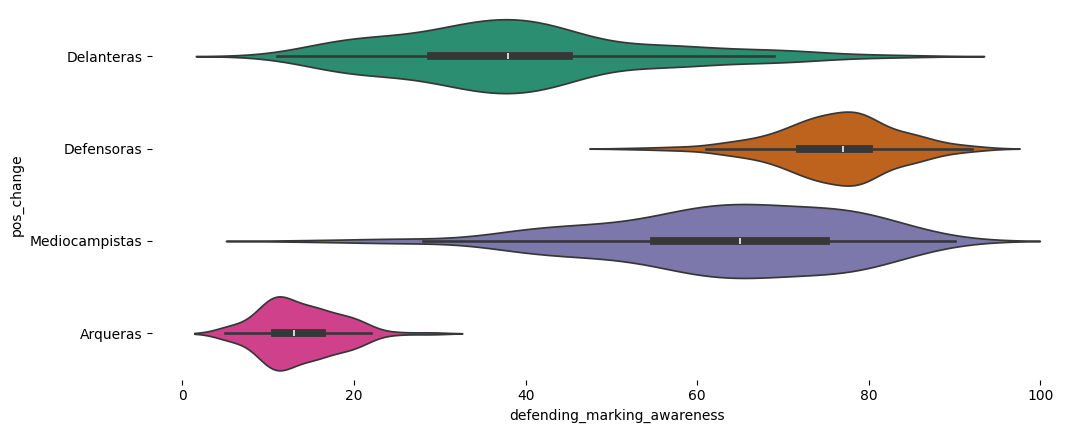

In [269]:
from matplotlib import pyplot as plt
import seaborn as sns
scat_1_box=df_base.copy()[['long_name',"pos_change",skill_1]]
figsize = (12, 1.2 * len(scat_1_box['pos_change'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(scat_1_box, x=skill_1, y='pos_change', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-270-5086279ad94f>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




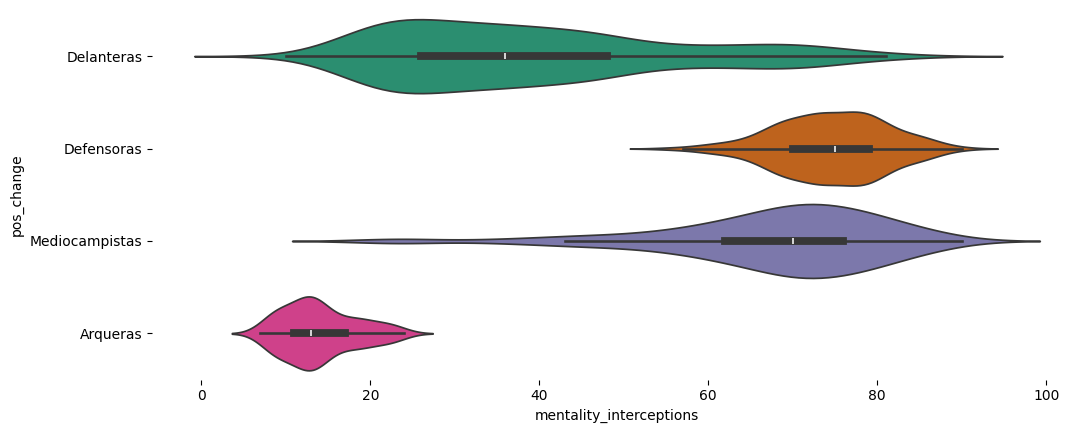

In [270]:
from matplotlib import pyplot as plt
import seaborn as sns
scat_1_box=df_base.copy()[['long_name',"pos_change",skill_2]]
figsize = (12, 1.2 * len(scat_1_box['pos_change'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(scat_1_box, x=skill_2, y='pos_change', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [271]:
import plotly.express as px

fig = px.scatter(
    scat_1,
    x=skill_1,
    y=skill_2,
    color='pos_change',
    hover_data=['long_name']
)


fig.show()


In [272]:
skill_1='attacking_finishing'
skill_2="skill_dribbling"

In [273]:
scat_2=df_base.copy()[['long_name',"player_positions",'pos_change',skill_1, skill_2]]
scat_2#.head(2)

,long_name,player_positions,pos_change,attacking_finishing,skill_dribbling
0,Samantha May Kerr,LS,Delanteras,93,90
1,Wéndèleine Thérèse Renard,LCB,Defensoras,70,69
2,Alexandra Morgan Carrasco,LS,Delanteras,95,87
3,Ada Martine Stolsmo Hegerberg,LS,Delanteras,94,91
4,Lucia Roberta Tough Bronze,LWB,Defensoras,73,79
...,...,...,...,...,...
827,Juliane Vermersc,LW,Delanteras,53,62
828,Diana Daidelfo,LS,Delanteras,56,57
829,Chelsea Ferguson,LS,Delanteras,54,57
830,Clara Wibaut,GK,Arqueras,8,9


In [274]:
scat_2 = df_base.copy()[['long_name', 'player_positions','pos_change',skill_1, skill_2]]
grouped = scat_2.groupby('pos_change').agg({skill_1: 'mean', skill_2: 'mean'}).reset_index()


grouped_melted = grouped.melt(id_vars='pos_change', value_vars=[skill_1, skill_2],
                              var_name='Metric', value_name='Average')


fig = px.bar(grouped_melted, x='pos_change', y='Average', color='Metric',
             title='Promedio de skill_1 y skill_2 por Posición de Cambio',
             labels={'pos_change': 'Posición de Cambio', 'Average': 'Promedio'},
             height=600, text='Average')


fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.show()


<ipython-input-275-d19a0209f817>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




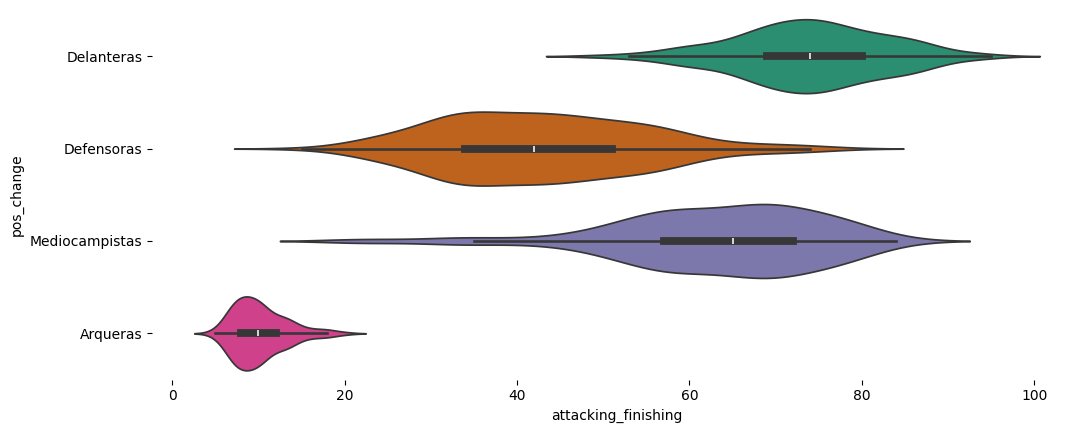

In [275]:
from matplotlib import pyplot as plt
import seaborn as sns
scat_1_box=df_base.copy()[['long_name',"pos_change",skill_1]]
figsize = (12, 1.2 * len(scat_1_box['pos_change'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(scat_1_box, x=skill_1, y='pos_change', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-276-5086279ad94f>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




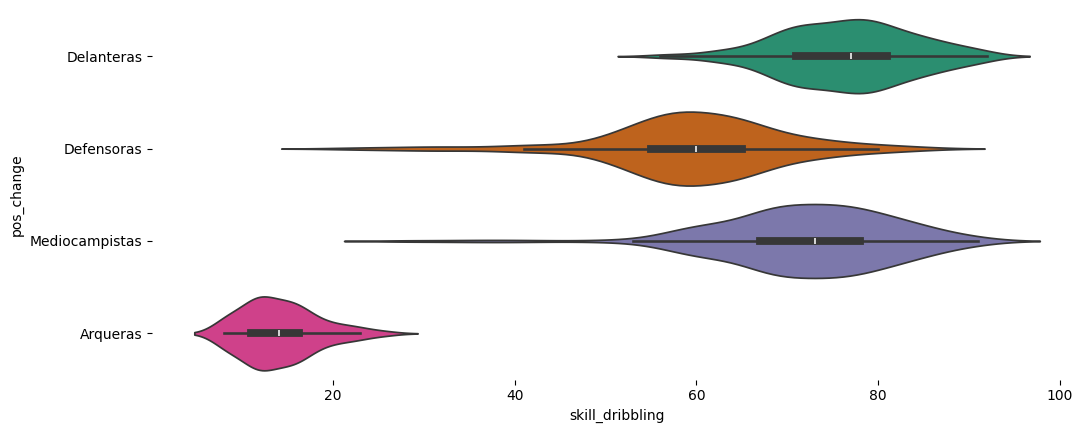

In [276]:
from matplotlib import pyplot as plt
import seaborn as sns
scat_1_box=df_base.copy()[['long_name',"pos_change",skill_2]]
figsize = (12, 1.2 * len(scat_1_box['pos_change'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(scat_1_box, x=skill_2, y='pos_change', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [277]:
import plotly.express as px

# Creación del scatterplot
fig = px.scatter(
    scat_2,
    x=skill_1,
    y=skill_2,
    color='pos_change',
    hover_data=['long_name']
)

# Mostrar el gráfico
fig.show()

# **3- Pregunta: ¿Se realizó alguna normalización o escalado de la base? ¿Por qué ?**

---

En este punto, las variables están en las mismas unidades y no existen outliers, por lo que no es necesario por el momento realizar el escalado de los datos.
Para aplicar Aprendizaje No Supervisado como PCA o algoritmos de Clústering como k-means sí será necesario escalar los datos.
En el caso de K-means utiliza medidas de distancia (como la distancia euclidiana) para agrupar puntos y si una variable tiene un rango mayor que otras, tendrá un mayor peso en el cálculo de la distancia, sesgando los resultados hacia esa variable


#**4- Aplicación de clustering para encontrar grupos de jugadoras con habilidades equivalentes, por ejemplo, jugadoras que podrían intercambiarse en el caso de una lesión o cuando una jugadora está cansada. Para esto utilice como mínimo dos técnicas de clustering: por ejemplo k-medias, DBSCAN, mezcla de Gaussianas y/o alguna jerárquica. Justifiquen por qué eligen los diferentes hiper-parámetros que se puedan elegir según el método: número de clusters, medida de distancia, criterio de aglomeración…**

---



In [278]:
df_cols=df_base.copy()[['long_name','player_positions','pos_change','overall',
                        'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys',
                        'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
                        'movement_balance',
                        'power_strength',
                        'mentality_aggression', 'mentality_interceptions',
                        'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle',
                        ]]

In [279]:
df_cols.isna().sum()

,0
long_name,0
player_positions,0
pos_change,0
overall,0
attacking_crossing,0
attacking_finishing,0
attacking_heading_accuracy,0
attacking_short_passing,0
attacking_volleys,0
skill_dribbling,0


In [280]:
df_name=df_cols.copy()[['long_name','player_positions','pos_change']]
df_cols=df_cols.drop(['long_name','player_positions','pos_change'],axis=1)
df_cols.head(3)

,overall,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_balance,power_strength,mentality_aggression,mentality_interceptions,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle
0,91,70,93,91,78,92,90,76,68,64,92,82,86,70,24,44,39,30
1,91,51,70,96,84,55,69,65,58,87,85,34,93,88,90,93,94,91
2,90,71,95,86,91,87,87,68,70,82,93,67,81,53,46,41,43,39


In [281]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cols)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

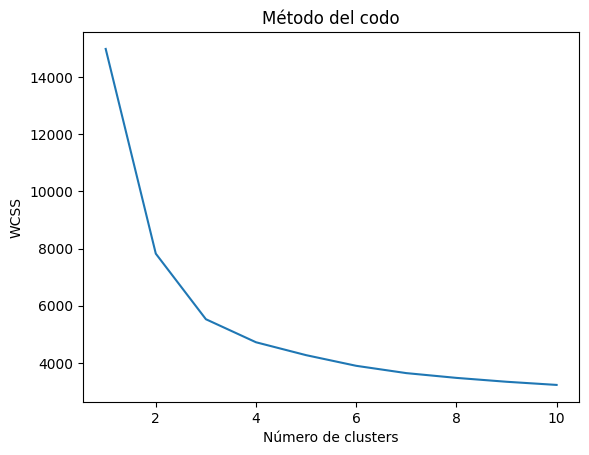

In [282]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


wcss = []  # Suma de los cuadrados dentro de los clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Graficar el método del codo
plt.plot(range(1, 11), wcss)
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()


In [283]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [284]:
df_cols['Cluster'] = clusters
df_cols.head()

,overall,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_balance,power_strength,mentality_aggression,mentality_interceptions,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,Cluster
0,91,70,93,91,78,92,90,76,68,64,92,82,86,70,24,44,39,30,1
1,91,51,70,96,84,55,69,65,58,87,85,34,93,88,90,93,94,91,3
2,90,71,95,86,91,87,87,68,70,82,93,67,81,53,46,41,43,39,1
3,90,71,94,93,84,90,91,79,75,72,91,47,81,65,23,42,33,30,1
4,89,87,73,82,85,66,79,88,81,80,85,82,90,82,85,89,91,89,3


In [285]:
nuevo_df=pd.concat([df_name,df_cols],axis=1)
nuevo_df#.head(3)
nuevo_df_k_means = nuevo_df.copy()

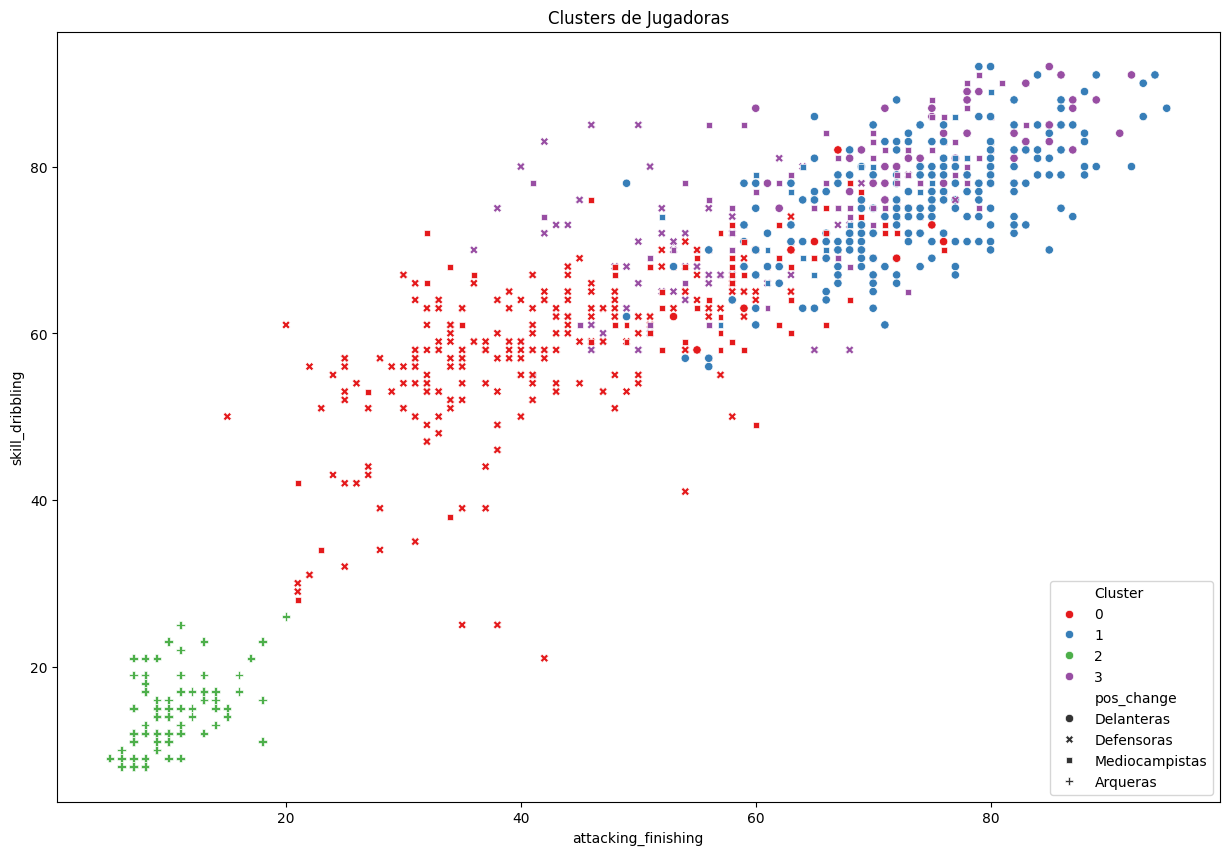

In [286]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

sns.scatterplot(x=nuevo_df[skill_1], y=nuevo_df[skill_2], hue=nuevo_df['Cluster'], style=nuevo_df['pos_change'], palette='Set1')
plt.title('Clusters de Jugadoras')
# plt.show()
plt.legend(loc='lower right')

A priori decimos que clasifica relativamente bien... pero viendo en detalle observamos que mezcla mediocampistas con delanteros.

# **DBSCAN**

---



In [287]:
X_scaled

array([[ 2.55513409,  0.67180011,  1.68948436, ..., -0.37814594,
        -0.6723256 , -0.90618153],
       [ 2.55513409, -0.25319041,  0.68747064, ...,  1.65969327,
         1.60306967,  1.6645577 ],
       [ 2.39435118,  0.72048383,  1.77661599, ..., -0.5029116 ,
        -0.50684231, -0.52689213],
       ...,
       [-2.91148466, -1.17818093, -0.00958238, ..., -1.45944837,
        -1.3756296 , -1.28547092],
       [-2.91148466, -2.00580403, -2.01360983, ..., -1.79215681,
        -1.83070865, -1.66476031],
       [-2.91148466, -0.44792526, -0.22741145, ..., -0.58608871,
         0.11372004, -0.35831907]])

In [288]:
df_cols=df_cols.drop('Cluster',axis=1)
df_cols.head(2)

,overall,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_balance,power_strength,mentality_aggression,mentality_interceptions,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle
0,91,70,93,91,78,92,90,76,68,64,92,82,86,70,24,44,39,30
1,91,51,70,96,84,55,69,65,58,87,85,34,93,88,90,93,94,91


In [289]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cols)


eps_values = np.arange(0.1, 2.0, 0.1)
min_samples_values = [3, 5, 10]


for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters_dbscan = dbscan.fit_predict(X_scaled)
        unique_labels = set(clusters_dbscan)

        print(f"eps={eps}, min_samples={min_samples}, Clusters: {len(unique_labels) - (1 if -1 in clusters_dbscan else 0)}")
        print(f"Points classified as noise (-1): {np.sum(clusters_dbscan == -1)}\n")



eps=0.1, min_samples=3, Clusters: 0
Points classified as noise (-1): 832

eps=0.1, min_samples=5, Clusters: 0
Points classified as noise (-1): 832

eps=0.1, min_samples=10, Clusters: 0
Points classified as noise (-1): 832

eps=0.2, min_samples=3, Clusters: 0
Points classified as noise (-1): 832

eps=0.2, min_samples=5, Clusters: 0
Points classified as noise (-1): 832

eps=0.2, min_samples=10, Clusters: 0
Points classified as noise (-1): 832

eps=0.30000000000000004, min_samples=3, Clusters: 0
Points classified as noise (-1): 832

eps=0.30000000000000004, min_samples=5, Clusters: 0
Points classified as noise (-1): 832

eps=0.30000000000000004, min_samples=10, Clusters: 0
Points classified as noise (-1): 832

eps=0.4, min_samples=3, Clusters: 0
Points classified as noise (-1): 832

eps=0.4, min_samples=5, Clusters: 0
Points classified as noise (-1): 832

eps=0.4, min_samples=10, Clusters: 0
Points classified as noise (-1): 832

eps=0.5, min_samples=3, Clusters: 1
Points classified as noi

In [290]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


# Aplicar DBSCAN
dbscan = DBSCAN(eps = 1.3 , min_samples = 5)
clusters_dbscan = dbscan.fit_predict(X_scaled)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cols)

# Agregar los clusters al dataset
df_cols['DBSCAN_Cluster'] = clusters_dbscan
df_cols

,overall,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_balance,power_strength,mentality_aggression,mentality_interceptions,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,DBSCAN_Cluster
0,91,70,93,91,78,92,90,76,68,64,92,82,86,70,24,44,39,30,-1
1,91,51,70,96,84,55,69,65,58,87,85,34,93,88,90,93,94,91,-1
2,90,71,95,86,91,87,87,68,70,82,93,67,81,53,46,41,43,39,-1
3,90,71,94,93,84,90,91,79,75,72,91,47,81,65,23,42,33,30,-1
4,89,87,73,82,85,66,79,88,81,80,85,82,90,82,85,89,91,89,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,57,55,53,48,52,24,62,49,59,41,60,67,75,49,51,55,57,54,-1
828,57,52,56,57,60,52,57,49,53,49,55,78,56,29,19,15,33,33,-1
829,57,32,54,60,57,53,57,34,45,39,58,65,63,45,17,18,22,21,-1
830,57,15,8,13,22,8,9,15,12,21,12,45,37,21,13,10,11,12,-1


In [291]:
nuevo_df=pd.concat([df_name,df_cols],axis=1)
nuevo_df#.head(3)

,long_name,player_positions,pos_change,overall,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,...,skill_long_passing,skill_ball_control,movement_balance,power_strength,mentality_aggression,mentality_interceptions,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,DBSCAN_Cluster
0,Samantha May Kerr,LS,Delanteras,91,70,93,91,78,92,90,...,64,92,82,86,70,24,44,39,30,-1
1,Wéndèleine Thérèse Renard,LCB,Defensoras,91,51,70,96,84,55,69,...,87,85,34,93,88,90,93,94,91,-1
2,Alexandra Morgan Carrasco,LS,Delanteras,90,71,95,86,91,87,87,...,82,93,67,81,53,46,41,43,39,-1
3,Ada Martine Stolsmo Hegerberg,LS,Delanteras,90,71,94,93,84,90,91,...,72,91,47,81,65,23,42,33,30,-1
4,Lucia Roberta Tough Bronze,LWB,Defensoras,89,87,73,82,85,66,79,...,80,85,82,90,82,85,89,91,89,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,Juliane Vermersc,LW,Delanteras,57,55,53,48,52,24,62,...,41,60,67,75,49,51,55,57,54,-1
828,Diana Daidelfo,LS,Delanteras,57,52,56,57,60,52,57,...,49,55,78,56,29,19,15,33,33,-1
829,Chelsea Ferguson,LS,Delanteras,57,32,54,60,57,53,57,...,39,58,65,63,45,17,18,22,21,-1
830,Clara Wibaut,GK,Arqueras,57,15,8,13,22,8,9,...,21,12,45,37,21,13,10,11,12,-1


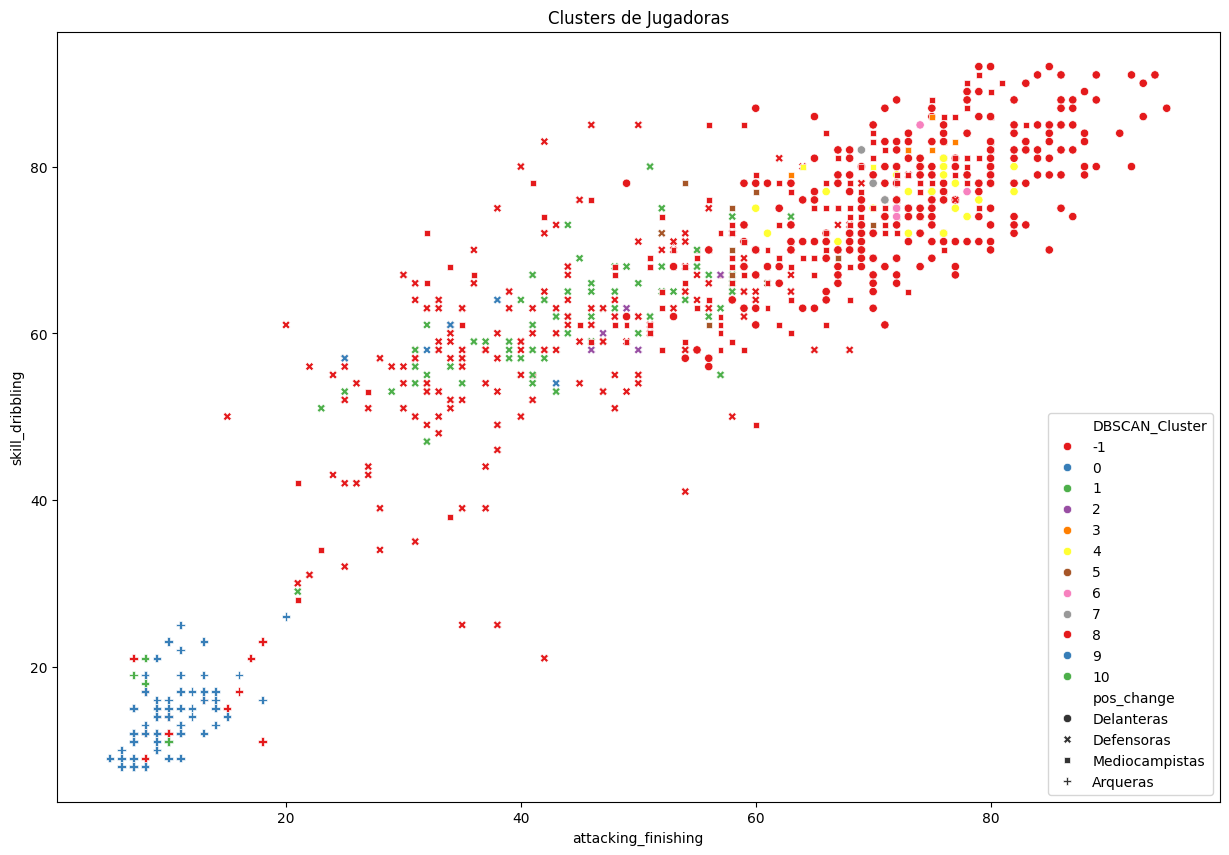

In [292]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

sns.scatterplot(x=nuevo_df[skill_1], y=nuevo_df[skill_2], hue=nuevo_df['DBSCAN_Cluster'], style=nuevo_df['pos_change'], palette='Set1')
plt.title('Clusters de Jugadoras')
# plt.show()
plt.legend(loc='lower right')

In [293]:
from collections import Counter

# Asumiendo que `clusters_dbscan` es el resultado de aplicar DBSCAN
# y contiene las etiquetas de los clusters

# Contar la cantidad de instancias en cada cluster
cluster_counts = Counter(clusters_dbscan)

# Convertir a DataFrame para una mejor visualización
cluster_counts_df = pd.DataFrame.from_dict(cluster_counts, orient='index', columns=['Count']).sort_index()

# Mostrar el conteo de cada cluster
cluster_counts_df

,Count
-1,597
0,81
1,71
2,5
3,6
4,25
5,14
6,5
7,5
8,14


Como puede analizarse en el grafico y la tabla encontramos varios puntos clasificados como -1.  Al utilizar el algoritmo DBSCAN (Density-Based Spatial Clustering of Applications with Noise) el valor -1 tiene un significado en el proceso de Clustering. La etiqueta -1 se asigna a aquellos puntos que son considerados "ruido" o "outliers". Es decir, estos puntos no pertenecen a ningún cluster identificado por el algoritmo.

Es por esto que entre este algoritmo de clusterizacion y el de K-means, consideramos al ultimo mas apropiado.





#**Utilizamos el Dendograma**




In [294]:
X_scaled

array([[ 2.55513409,  0.67180011,  1.68948436, ..., -0.37814594,
        -0.6723256 , -0.90618153],
       [ 2.55513409, -0.25319041,  0.68747064, ...,  1.65969327,
         1.60306967,  1.6645577 ],
       [ 2.39435118,  0.72048383,  1.77661599, ..., -0.5029116 ,
        -0.50684231, -0.52689213],
       ...,
       [-2.91148466, -1.17818093, -0.00958238, ..., -1.45944837,
        -1.3756296 , -1.28547092],
       [-2.91148466, -2.00580403, -2.01360983, ..., -1.79215681,
        -1.83070865, -1.66476031],
       [-2.91148466, -0.44792526, -0.22741145, ..., -0.58608871,
         0.11372004, -0.35831907]])

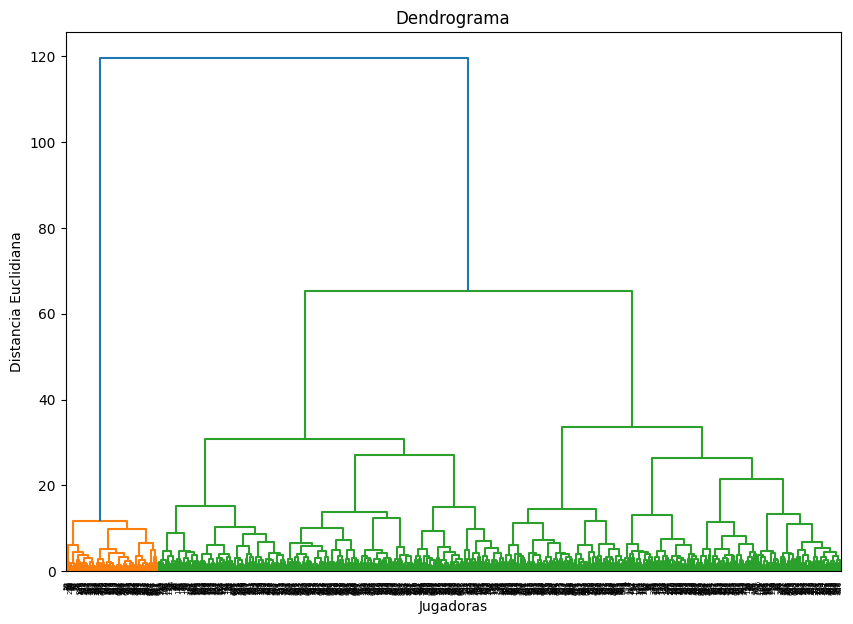

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [295]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Jugadoras')
plt.ylabel('Distancia Euclidiana')
plt.show()


agg_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
clusters_hierarchical = agg_cluster.fit_predict(X_scaled)


df_cols['Hierarchical_Cluster'] = clusters_hierarchical


In [296]:
nuevo_df=pd.concat([df_name,df_cols],axis=1)
nuevo_df#.head(3)

,long_name,player_positions,pos_change,overall,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,...,skill_ball_control,movement_balance,power_strength,mentality_aggression,mentality_interceptions,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,DBSCAN_Cluster,Hierarchical_Cluster
0,Samantha May Kerr,LS,Delanteras,91,70,93,91,78,92,90,...,92,82,86,70,24,44,39,30,-1,2
1,Wéndèleine Thérèse Renard,LCB,Defensoras,91,51,70,96,84,55,69,...,85,34,93,88,90,93,94,91,-1,0
2,Alexandra Morgan Carrasco,LS,Delanteras,90,71,95,86,91,87,87,...,93,67,81,53,46,41,43,39,-1,2
3,Ada Martine Stolsmo Hegerberg,LS,Delanteras,90,71,94,93,84,90,91,...,91,47,81,65,23,42,33,30,-1,2
4,Lucia Roberta Tough Bronze,LWB,Defensoras,89,87,73,82,85,66,79,...,85,82,90,82,85,89,91,89,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,Juliane Vermersc,LW,Delanteras,57,55,53,48,52,24,62,...,60,67,75,49,51,55,57,54,-1,0
828,Diana Daidelfo,LS,Delanteras,57,52,56,57,60,52,57,...,55,78,56,29,19,15,33,33,-1,1
829,Chelsea Ferguson,LS,Delanteras,57,32,54,60,57,53,57,...,58,65,63,45,17,18,22,21,-1,1
830,Clara Wibaut,GK,Arqueras,57,15,8,13,22,8,9,...,12,45,37,21,13,10,11,12,-1,3


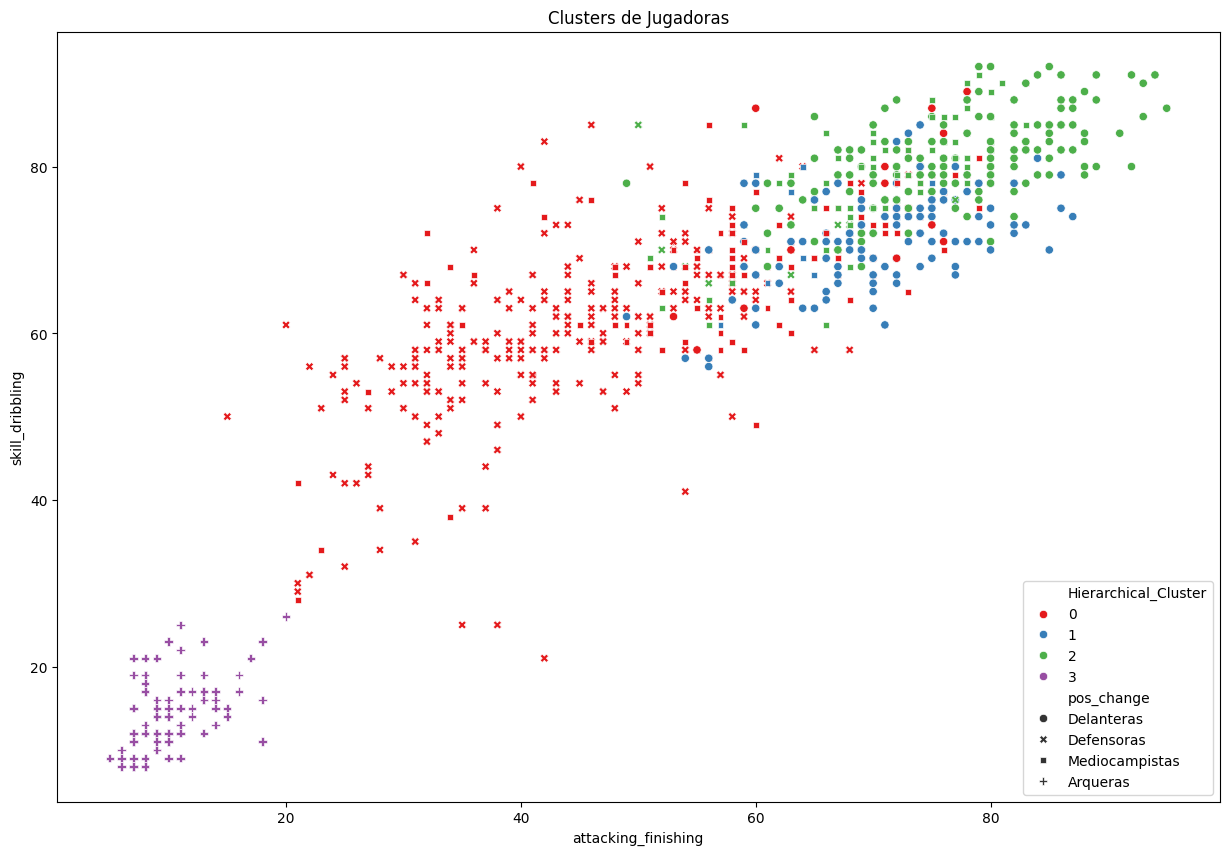

In [297]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

sns.scatterplot(x=nuevo_df[skill_1], y=nuevo_df[skill_2], hue=nuevo_df['Hierarchical_Cluster'], style=nuevo_df['pos_change'], palette='Set1')
plt.title('Clusters de Jugadoras')
# plt.show()
plt.legend(loc='lower right')

#**5- Análisis cualitativo de los clusters encontrados. ¿Qué hay en cada cluster? ¿Son efectivamente equivalentes las jugadoras de un cluster, es decir, podrían cumplir el mismo rol en un equipo? Si se trata de clusters heterogéneos, ¿por qué razón pueden haber sido agrupadas las jugadoras del cluster? ¿Qué motiva las diferencias en tamaño?**

---


**Nuestro analisis se centrara en el Algoritmo de K-Means ya que fue el que mejor resultados**

**Arqueros:** dado el grafico vemos que estan bien representados por el cluster y si se necesita realizar algun cambio podriamos hacerlo sin dudarlo

**Defensores:** Aqui vemos que hay algunos valores los cuales los ha clasificado mal, pero estos son minimos, por lo tanto tambien podriamos hacer el cambio

**Mediocampistas y Delanteros:** Aqui hay mucha dispersion, dado que el algoritmo kmeans no puede diferenciar de forma precisa estos 2 grupos, ambos grupos tienen skills muy parecidos y solo se marcan diferencias en su jugadores mas destacados en ambos clusters. Por lo tanto de querer realizar algun cambio en estos 2 clusters tendremos que elegir valores muy cercanos al centro del cluster.

Traemos el Resultados de las Clusterizacion del K-Means

In [298]:
_df_5 = nuevo_df_k_means.copy()

Descripción estadística de cada cluster

In [299]:
for cluster_kmeans_stats in _df_5['Cluster'].unique():
    print(f"Cluster {cluster_kmeans_stats} Summary:")
    display(_df_5[_df_5['Cluster'] == cluster_kmeans_stats].describe())

Cluster 1 Summary:


,overall,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_balance,power_strength,mentality_aggression,mentality_interceptions,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,Cluster
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.0
mean,74.620968,63.552419,73.145161,60.649194,72.697581,66.370968,75.580645,63.459677,58.568548,60.870968,76.802419,71.955645,65.112903,50.346774,33.903226,34.447581,36.213710,31.931452,1.0
std,6.223363,12.163415,8.670947,14.333291,7.379894,9.740327,6.812226,10.144222,8.774003,10.393838,6.451099,11.413912,12.335860,12.257391,11.787882,10.268721,10.634082,9.570077,0.0
min,57.000000,29.000000,49.000000,27.000000,45.000000,34.000000,56.000000,30.000000,34.000000,22.000000,55.000000,31.000000,30.000000,22.000000,10.000000,11.000000,11.000000,11.000000,1.0
25%,71.000000,57.750000,68.000000,50.000000,68.000000,60.000000,71.000000,57.000000,52.000000,54.000000,73.000000,67.000000,58.000000,42.000000,24.000000,27.000000,28.000000,26.000000,1.0
50%,74.500000,65.000000,73.000000,61.500000,74.000000,67.000000,76.000000,64.000000,58.000000,62.000000,77.000000,73.000000,67.000000,52.000000,32.500000,35.000000,36.000000,31.500000,1.0
75%,79.000000,73.000000,79.000000,71.000000,78.000000,73.000000,80.000000,70.250000,63.000000,68.000000,81.000000,79.000000,73.000000,59.000000,42.000000,41.000000,42.000000,38.000000,1.0
max,91.000000,85.000000,95.000000,93.000000,91.000000,92.000000,92.000000,88.000000,86.000000,84.000000,93.000000,94.000000,90.000000,82.000000,81.000000,66.000000,67.000000,71.000000,1.0


Cluster 3 Summary:


,overall,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_balance,power_strength,mentality_aggression,mentality_interceptions,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,Cluster
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.0
mean,80.040201,71.854271,66.120603,62.778894,81.105528,57.793970,76.311558,70.316583,62.879397,75.140704,80.190955,75.341709,67.130653,69.326633,73.246231,69.814070,73.582915,68.487437,3.0
std,4.202980,9.965793,12.604934,12.820492,5.295693,12.767255,8.148459,8.983446,11.886055,7.185866,5.188733,10.644571,12.335914,11.656222,10.129698,12.927561,10.703625,12.613869,0.0
min,70.000000,49.000000,36.000000,32.000000,57.000000,28.000000,55.000000,43.000000,26.000000,54.000000,65.000000,33.000000,33.000000,31.000000,43.000000,34.000000,27.000000,34.000000,3.0
25%,77.000000,65.000000,56.000000,53.500000,78.000000,48.000000,71.000000,64.500000,55.000000,71.000000,77.000000,69.500000,60.000000,61.500000,69.000000,59.500000,68.000000,59.500000,3.0
50%,80.000000,73.000000,69.000000,63.000000,81.000000,59.000000,77.000000,70.000000,64.000000,76.000000,80.000000,76.000000,69.000000,70.000000,75.000000,74.000000,76.000000,72.000000,3.0
75%,83.000000,79.000000,75.500000,72.500000,85.000000,68.000000,82.000000,76.000000,71.000000,80.000000,84.000000,84.000000,76.000000,78.000000,81.000000,80.000000,80.000000,79.000000,3.0
max,91.000000,94.000000,92.000000,96.000000,93.000000,89.000000,92.000000,92.000000,89.000000,92.000000,93.000000,95.000000,93.000000,95.000000,90.000000,93.000000,94.000000,92.000000,3.0


Cluster 2 Summary:


,overall,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_balance,power_strength,mentality_aggression,mentality_interceptions,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,Cluster
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
mean,73.780000,13.750000,10.160000,11.64000,26.840000,9.720000,14.140000,14.810000,14.170000,26.090000,18.910000,50.04000,55.320000,24.860000,13.970000,13.630000,14.120000,13.580000,2.0
std,6.702299,3.721016,3.060732,2.90774,5.374312,2.636496,4.134164,3.773097,3.676447,6.260498,5.492134,7.45887,12.525433,5.124747,4.248482,4.529711,2.712783,2.738355,0.0
min,57.000000,6.000000,5.000000,6.00000,14.000000,4.000000,8.000000,8.000000,10.000000,15.000000,9.000000,40.00000,32.000000,12.000000,7.000000,5.000000,9.000000,8.000000,2.0
25%,70.000000,12.000000,8.000000,9.00000,24.000000,8.000000,11.000000,12.750000,12.000000,22.000000,15.000000,44.00000,43.750000,21.000000,11.000000,10.750000,12.000000,11.750000,2.0
50%,73.000000,13.000000,10.000000,12.00000,28.000000,9.000000,14.000000,14.000000,13.000000,25.500000,18.500000,49.00000,56.000000,25.000000,13.000000,13.000000,14.000000,13.000000,2.0
75%,78.000000,15.000000,12.000000,14.00000,31.000000,11.000000,16.250000,16.250000,15.000000,30.250000,22.000000,54.25000,67.000000,28.000000,17.000000,16.250000,15.000000,15.000000,2.0
max,88.000000,33.000000,20.000000,18.00000,35.000000,19.000000,26.000000,29.000000,36.000000,44.000000,38.000000,69.00000,78.000000,40.000000,24.000000,29.000000,23.000000,22.000000,2.0


Cluster 0 Summary:


,overall,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_balance,power_strength,mentality_aggression,mentality_interceptions,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,Cluster
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.0
mean,72.554386,53.768421,44.901754,64.803509,72.028070,39.203509,59.396491,50.747368,44.568421,63.919298,68.578947,65.701754,69.084211,67.101754,71.301754,71.487719,73.449123,69.978947,0.0
std,5.219953,13.189133,13.468959,11.469340,6.180323,10.714311,9.730560,11.761092,10.633113,9.469957,5.513579,11.793357,10.563687,11.060660,7.261719,9.539246,7.133168,8.408973,0.0
min,57.000000,23.000000,15.000000,35.000000,52.000000,15.000000,21.000000,23.000000,22.000000,31.000000,50.000000,30.000000,34.000000,32.000000,45.000000,39.000000,52.000000,43.000000,0.0
25%,70.000000,44.000000,34.000000,56.000000,69.000000,33.000000,55.000000,43.000000,37.000000,58.000000,65.000000,59.000000,63.000000,59.000000,68.000000,66.000000,69.000000,65.000000,0.0
50%,73.000000,54.000000,44.000000,65.000000,72.000000,39.000000,60.000000,52.000000,45.000000,65.000000,69.000000,67.000000,69.000000,69.000000,72.000000,73.000000,74.000000,71.000000,0.0
75%,75.000000,64.000000,56.000000,74.000000,76.000000,45.000000,65.000000,59.000000,51.000000,70.000000,72.000000,75.000000,75.000000,75.000000,76.000000,78.000000,78.000000,76.000000,0.0
max,87.000000,80.000000,76.000000,89.000000,89.000000,68.000000,82.000000,71.000000,74.000000,86.000000,85.000000,89.000000,92.000000,94.000000,89.000000,92.000000,92.000000,89.000000,0.0


Calculamos el Adjusted Rank Index (ARI)

In [300]:
from sklearn.metrics import adjusted_rand_score

y_true = _df_5['pos_change']

ari = adjusted_rand_score(y_true, clusters)
print(f"Adjusted Rand Index: {ari:.4f}")

Adjusted Rand Index: 0.4846


El **Ajusted Rank Index** es una métrica que compara las etiquetas predichas por el modelo de clustering con las etiquetas reales conocidas y ajusta el índice Rand para la posibilidad de que el acuerdo entre las etiquetas ocurra por casualidad. Es una métrica que toma valores entre -1 y 1, donde un valor cercano a 1 indica una buena concordancia con las etiquetas reales.

Como nuestro caso, dicho indice toma el valor de 0.49 sugiere que se estan capturando algunas de las estructuras de los datos, pero aún hay una cantidad significativa de diferencias entre las agrupaciones obtenidas por el modelo y las agrupaciones reales de la poscision de las jugadores


A continuacion analizamos por cada poscision como fue la clasificacion del Algoritmo de K-means

In [301]:
# Cluster = 0 , Defensoras

_df_5_defensoras = _df_5[_df_5['pos_change']=='Defensoras']
_total_defensoras_5 = len(_df_5_defensoras)
_df_5_defensoras['Count'] = 1
_df_5_defensoras_count = _df_5_defensoras.groupby(['Cluster'],as_index=False).agg({'Count':'sum'})
_df_5_defensoras_count['Proporcion'] = _df_5_defensoras_count['Count'] / _total_defensoras_5
_df_5_defensoras_count['Caso'] = np.where(_df_5_defensoras_count['Cluster']==0,'Defensoras Correctamente Clasificadas','Mediocampistas Clasificada como Defensoras')
_df_5_defensoras_count

<ipython-input-301-ed61e88b7331>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Cluster,Count,Proporcion,Caso
0,0,197,0.772549,Defensoras Correctamente Clasificadas
1,3,58,0.227451,Mediocampistas Clasificada como Defensoras


In [302]:
# Cluster = 1 Arqueras

_df_5_arquera = _df_5[_df_5['pos_change']=='Arqueras']
_total_arquera_5 = len(_df_5_arquera)
_df_5_arquera['Count'] = 1
_df_5_arquera_count = _df_5_arquera.groupby(['Cluster'],as_index=False).agg({'Count':'sum'})
_df_5_arquera_count['Proporcion'] = _df_5_arquera_count['Count'] / _total_arquera_5
_df_5_arquera_count['Caso'] = np.where(_df_5_arquera_count['Cluster']==1,'Arqueras Correctamente Clasificadas','Arqueras Mal Clasificadas')
_df_5_arquera_count

<ipython-input-302-ea16cd8e0328>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Cluster,Count,Proporcion,Caso
0,2,100,1.0,Arqueras Mal Clasificadas


In [303]:
# Cluster = 3 , Mediocampistas

_df_5_mediocampistas = _df_5[_df_5['pos_change']=='Mediocampistas']
_total_mediocampistas_5 = len(_df_5_mediocampistas)
_df_5_mediocampistas['Count'] = 1
_df_5_mediocampistas_count = _df_5_mediocampistas.groupby(['Cluster'],as_index=False).agg({'Count':'sum'})
_df_5_mediocampistas_count['Proporcion'] = _df_5_mediocampistas_count['Count'] / _total_mediocampistas_5
_df_5_mediocampistas_count['Caso'] = np.where(_df_5_mediocampistas_count['Cluster']==3,'Mediocampstas Correctamente Clasificadas',np.where(_df_5_mediocampistas_count['Cluster']==1,'Mediocampstas Clasificadas como Delanteras','Mediocampistas Clasificada como Defensoras'))
_df_5_mediocampistas_count

<ipython-input-303-c8d93d102729>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Cluster,Count,Proporcion,Caso
0,0,78,0.400000,Mediocampistas Clasificada como Defensoras
1,1,22,0.112821,Mediocampstas Clasificadas como Delanteras
2,3,95,0.487179,Mediocampstas Correctamente Clasificadas


In [304]:
# Cluster = 1 , Delanteras
_df_5_delanteras = _df_5[_df_5['pos_change']=='Delanteras']
_total_delanteras_5 = len(_df_5_delanteras)
_df_5_delanteras['Count'] = 1
_df_5_delanteras_count = _df_5_delanteras.groupby(['Cluster'],as_index=False).agg({'Count':'sum'})
_df_5_delanteras_count['Proporcion'] = _df_5_delanteras_count['Count'] / _total_delanteras_5
_df_5_delanteras_count['Caso'] = np.where(_df_5_delanteras_count['Cluster']==1,'Delanteras Correctamente Clasificadas',np.where(_df_5_delanteras_count['Cluster']==3,'Delanteras Clasificada como Mediocampistas','Delanteras Clasificada como Defensoras'))
_df_5_delanteras_count

<ipython-input-304-12665384d485>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Cluster,Count,Proporcion,Caso
0,0,10,0.035461,Delanteras Clasificada como Defensoras
1,1,226,0.801418,Delanteras Correctamente Clasificadas
2,3,46,0.163121,Delanteras Clasificada como Mediocampistas


*Analizando los resultados:*

*   **Arqueras**: Clasificacion Correcta del 100% de los casos
*   **Delanteras**: Clasificacion Correcta del 80% de los casos
*   **Defensoras**: Clasificacion Correcta del 77% de los casos
*   **Mediocampistas**: Clasificacion Correcta del 48% de los casos

# **6- Uso de alguna transformación (proyección, Embedding) para visualizar los resultados y/o usarla como preprocesado para aplicar alguna técnica de clustering.**

---



In [305]:
_df_6 = nuevo_df.fillna(0)
X = _df_6.select_dtypes(include=[float, int])
X=X.drop(['DBSCAN_Cluster','Hierarchical_Cluster'],axis=1)
X.head(2)


,overall,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_balance,power_strength,mentality_aggression,mentality_interceptions,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle
0,91,70,93,91,78,92,90,76,68,64,92,82,86,70,24,44,39,30
1,91,51,70,96,84,55,69,65,58,87,85,34,93,88,90,93,94,91


In [306]:
from sklearn.preprocessing import StandardScaler
# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

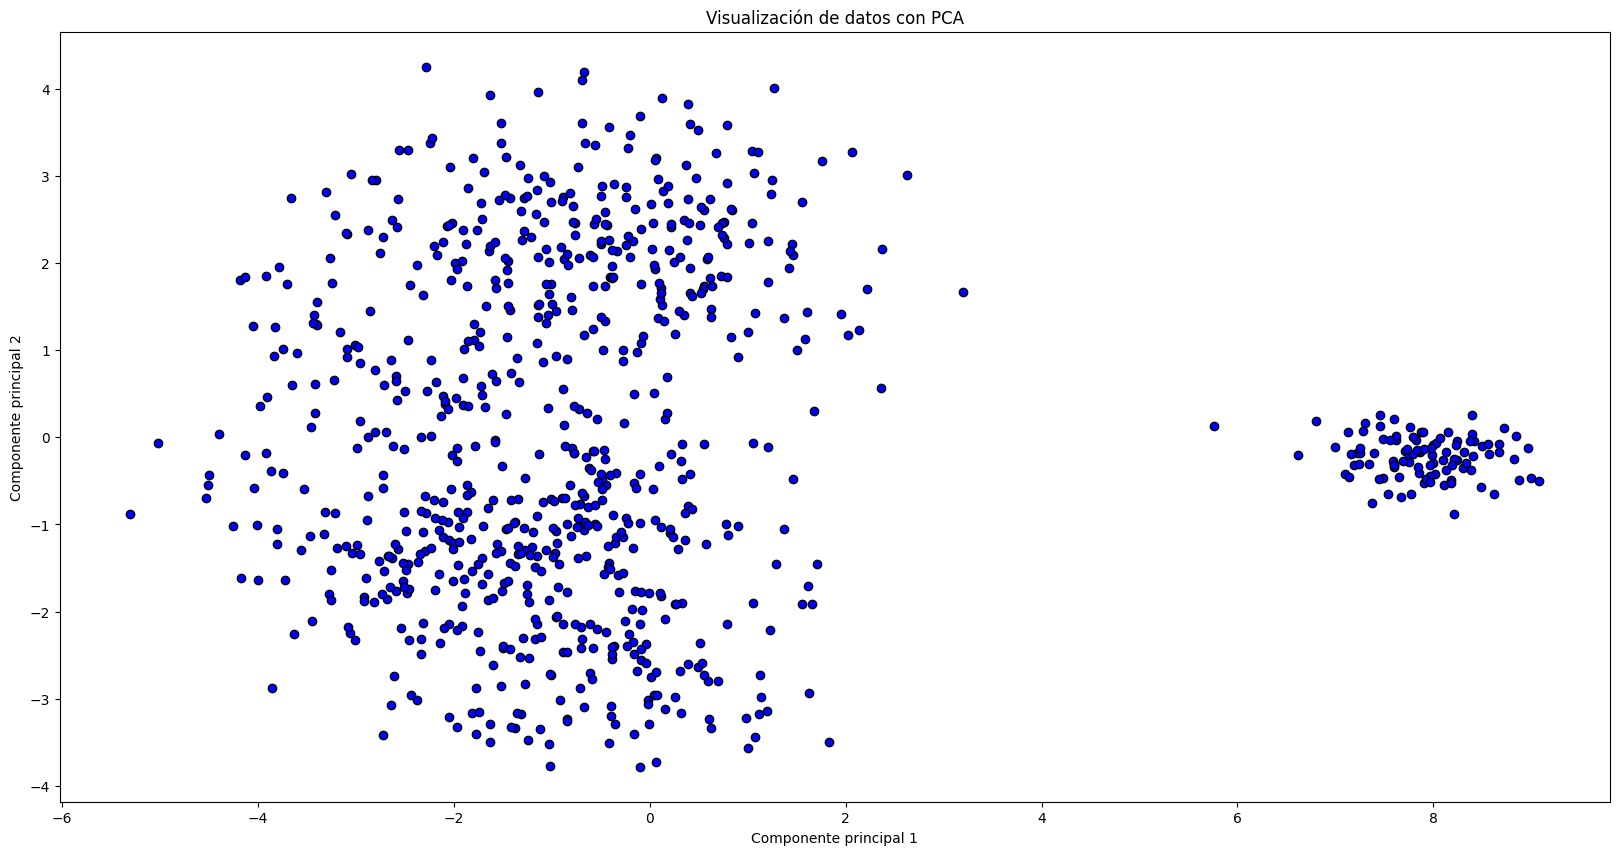

In [307]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

# Aplicamos PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', marker='o', edgecolor='k')
plt.title('Visualización de datos con PCA')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



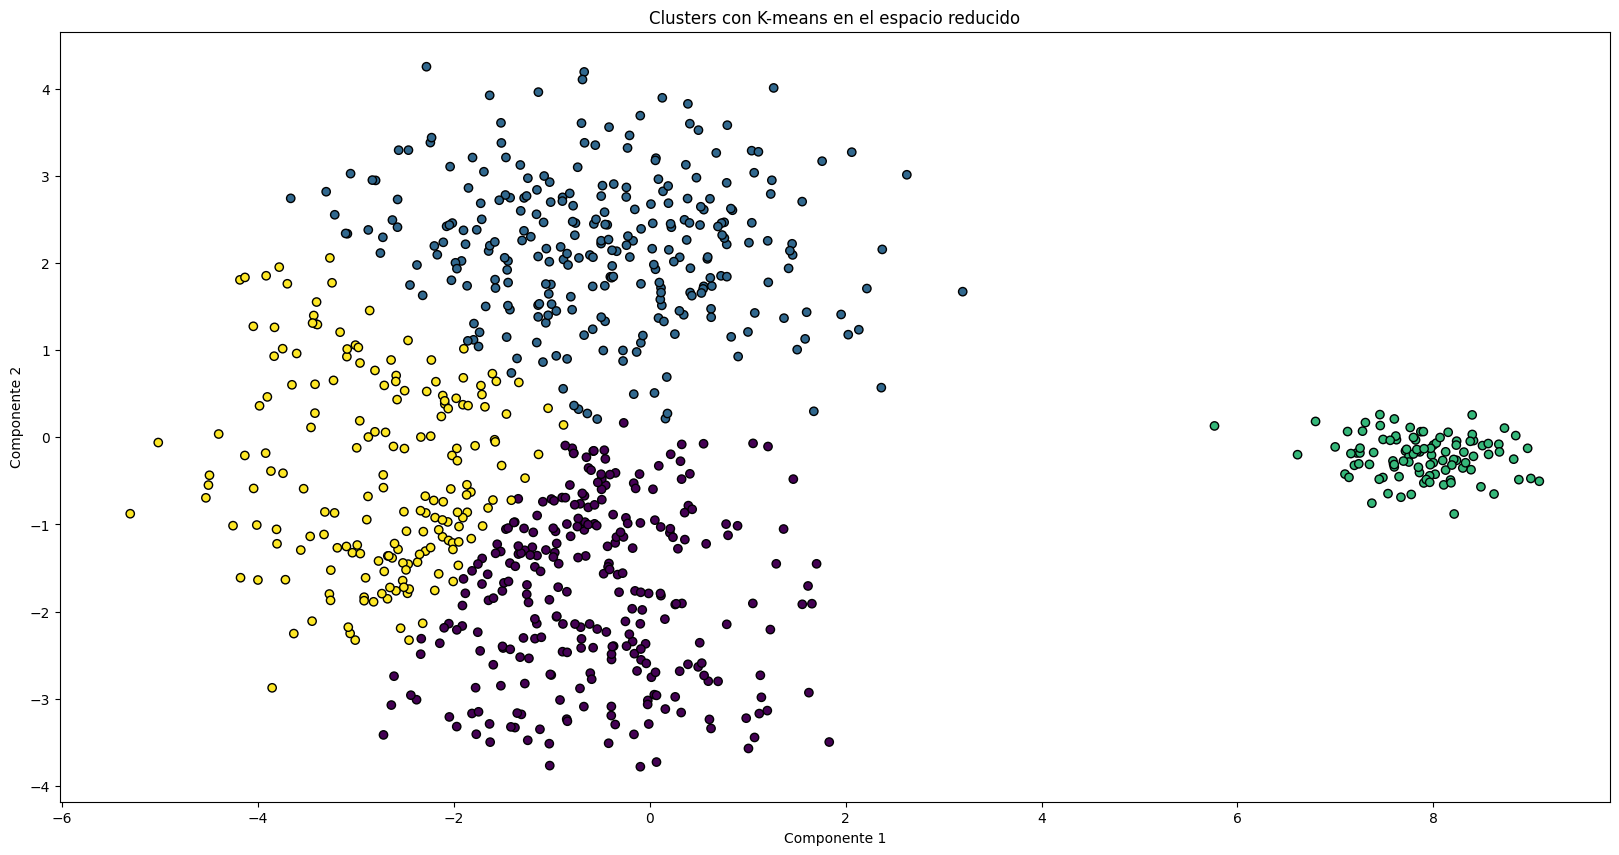

In [308]:
from sklearn.cluster import KMeans

plt.figure(figsize=(20, 10))

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Visualización de los clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k')
plt.title('Clusters con K-means en el espacio reducido')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()